In [ ]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 0. Описать задачу словами

Вы живете в Австралии и постоянно вечером задумываетесь: нужно ли Вам завтра на работу брать зонт? С помощью этого датасета можно предсказать: **будет ли завтра дождь?**
Это задача классификации с 2 классами: Да/Нет.

# 1. Прочитать данные

In [ ]:
path = kagglehub.dataset_download("jsphyg/weather-dataset-rattle-package")
print("Path to dataset files:", path)
filepath = path + "/weatherAUS.csv"
print("Path to main dataset:", filepath)
dataset = pd.read_csv(filepath)
dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce', format="%Y-%m-%d")

Path to dataset files: /root/.cache/kagglehub/datasets/jsphyg/weather-dataset-rattle-package/versions/2
Path to main dataset: /root/.cache/kagglehub/datasets/jsphyg/weather-dataset-rattle-package/versions/2/weatherAUS.csv


In [ ]:
dataset

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
dataset.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


## Описание столбцов:


*   `Date` - Дата наблюдения
*   `Location` - Название места нахождения погодной станции
*   `MinTemp` - Минимальная температура в °C
*   `MaxTemp`- Максимальная температура в °C
*   `Rainfall` - Количество осадков в мм
*   `Evaporation` - Испарения (так называемое испарение класса A в мм за 24 часа)
*   `Sunshine` - Количество солнечных часов
*   `WindGustDir` - Направление самого сильного порыва ветра за 24 часа
*   `WindGustSpeed` - Скорость самого сильного порыва ветра за 24 часа в км/ч
*   `WindDir9am` - Направление ветра в 9.00
*   `WindDir3pm` - Направление ветра в 15.00
*   `WindSpeed9am` - Усредненная скорость ветра за 10 минут до 9.00 в км/ч
*   `WindSpeed3pm` - Усредненная скорость ветра за 10 минут до 15.00 в км/ч
*   `Humidity9am` - Влажность (%) в 9.00
*   `Humidity3pm` - Влажность (%) в 15.00
*   `Pressure9am` - Атмосферное давление в гПА относительно уровня моря в 9.00
*   `Pressure3pm` - Атмосферное давление в гПА относительно уровня моря в 15.00
*   `Cloud9am` - Доля неба, закрытая облаками в 9.00. Измеряется в октах: сколько восьмых частей неба закрыто облаками. Значение 0 означает совершенно ясное небо, а 8 — полностью облачное.
*   `Cloud3pm` - Доля неба, закрытая облаками в 15.00.
*   `Temp9am` - Температура в 9.00 в °C
*   `Temp3pm` - Температура в 15.00 в °C
*   `RainToday` - Был ли сегодня дождь. 1 - если количество осадков превысило 1 мм, 0 - иначе
*   `RainTomorrow` - Будет ли дождь завтра. Переменная, которую надо предсказать.


In [ ]:
print(dataset.shape)
print(dataset.columns)
print(dataset.index)

(145460, 23)
Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')
RangeIndex(start=0, stop=145460, step=1)


# 3. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.

In [ ]:
dataset.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,2013-04-04 21:08:51.907053568,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
min,2007-11-01 00:00:00,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,2011-01-11 00:00:00,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,2013-06-02 00:00:00,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,2015-06-14 00:00:00,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,2017-06-25 00:00:00,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000
std,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665


In [ ]:
dataset.describe(include = ['object'])

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,135134,134894,141232,142199,142193
unique,49,16,16,16,2,2
top,Canberra,W,N,SE,No,No
freq,3436,9915,11758,10838,110319,110316


### Характеристики:


*   `Mean` - среднее арифметическое
*   `Std` - среднеквадратическое отклонение
*   `Min` - минимальное значение, которое может принимать величина
*   `Max` - максимальное значение, которое может принимать величина
*   `25%, 50%, 75%` - значения, которые соответствуют 3 квантилям.
*   `top` - наиболее часто встречающееся значение
*   `unique` - количество уникальных значений
*   `freq` - как часто встречается самое популярное значение





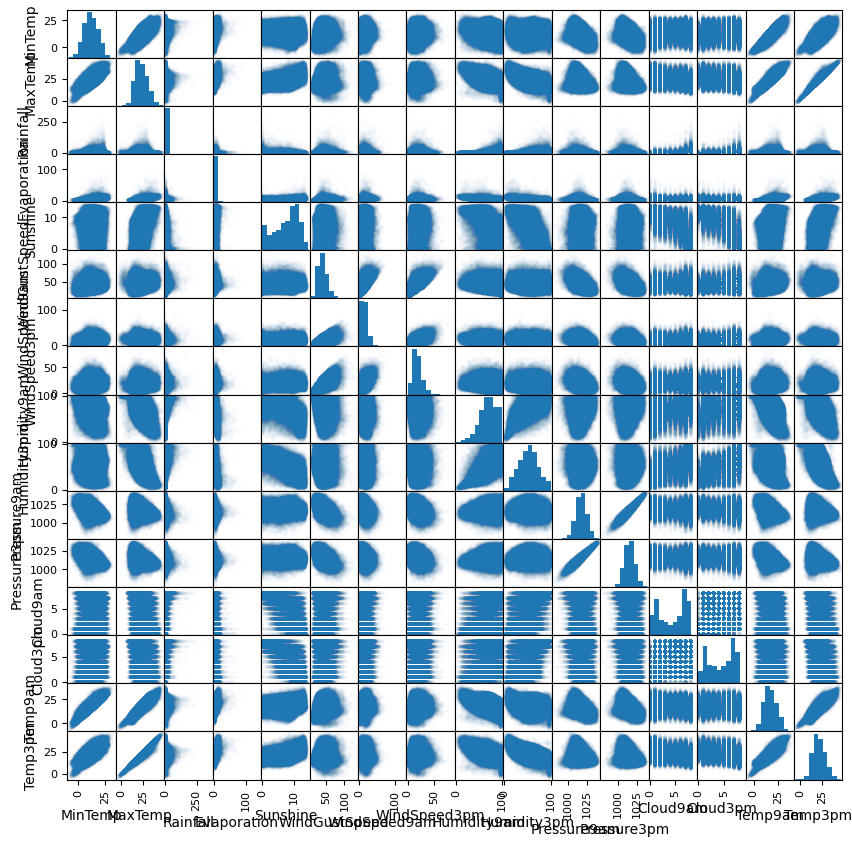

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, alpha = .01, figsize = (10, 10))
pass

Интерпретация матрицы диаграмм рассеивания:
1. Касательно диаграмм на главной диагонали:\
  У MinTemp, MaxTemp, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm получается нормальное распределение. \
  У Rainfall, Evaporation, WindGustSpeed, WindSpeed9am, WindSpeed3pm диаграммы скошены влево. Значит есть выбросы. \
  У Sunshine равномерное распределение.\
  У Cloud9am и Cloud3pm есть несколько пиков.
2. Остальные диаграммы:
  - Есть положительные корреляции в парах (там облако точек восходит): \
   MinTemp - MaxTemp, MinTemp - Temp9am, MinTemp - Temp3pm, MaxTemp - Temp9am, MaxTemp - Temp3pm, Temp9am-Temp3pm, WindSpeed9am - WindGustSpeed, WindSpeed3pm - WindGustSpeed, Pressure9am - Pressure3pm, Humidity9am - Humidity3pm. \
  Логично, что будет взаимосвязь между подобными парами признаков, учитывая их значение.
  - Есть отрицательные корреляции: \
  Между Humidity и различными характеристиками температуры. Значит, чем выше влажность, тем ниже температура.\
  Между Humidity и Sunshine. Очевидно, что когда солнце светит и небо чистое, то уровень влажности падает.
  - Есть отсутствие корреляции: \
  Интересно видеть, что количество солнечных часов в дне не влияет на температуру.
  - Также кое-где облако точек лежит целиком в малых значениях. \
  Значения Evaporation и Rainfall всегда небольшие. Это приводит к тому, что облако точек лежит в малых значениях во всех диаграммах. Видно, что в Rainfall есть выбросы.



In [ ]:
dataset.corr(numeric_only=True)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


### Визуализация корреляционной матрицы

<Axes: >

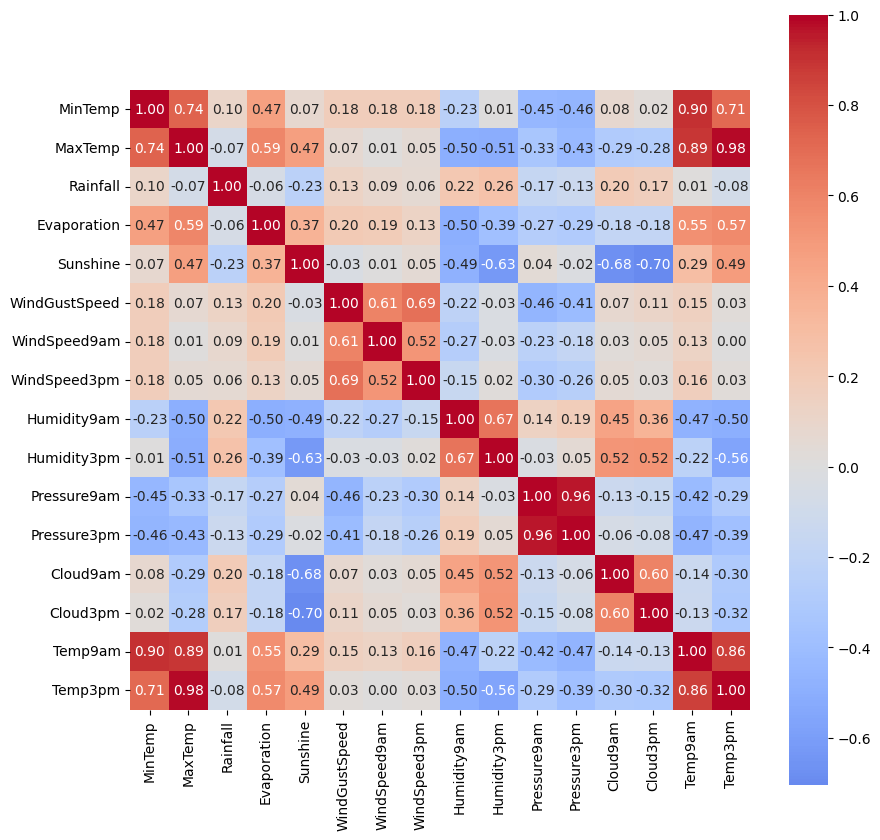

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(dataset.corr(numeric_only=True), annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f')

### Визуализация разбросов.

In [ ]:
dataset.quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995], numeric_only=True)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0.005,-3.1,5.399,0.0,0.2,0.0,13.0,0.0,0.0,14.0,7.0,997.5,996.1,0.0,0.0,0.9,4.4
0.010,-1.9,9.000,0.0,0.4,0.0,15.0,0.0,2.0,18.0,9.0,1000.2,998.5,0.0,0.0,2.6,7.6
0.050,1.8,12.800,0.0,1.0,0.3,20.0,0.0,6.0,34.0,17.0,1006.2,1004.0,0.0,0.0,6.9,11.6
0.100,4.0,14.500,0.0,1.4,1.5,24.0,4.0,9.0,44.0,23.0,1008.8,1006.4,1.0,1.0,8.9,13.2
0.500,12.0,22.600,0.0,4.8,8.4,39.0,13.0,19.0,70.0,52.0,1017.6,1015.2,5.0,5.0,16.7,21.1
0.900,20.8,32.900,6.2,10.2,12.1,57.0,26.0,30.0,94.0,79.0,1026.7,1024.3,8.0,8.0,25.9,31.2
0.950,23.0,35.500,13.0,12.0,12.8,65.0,30.0,35.0,98.0,88.0,1029.5,1026.9,8.0,8.0,28.2,33.7
0.990,25.8,40.100,37.4,18.4,13.4,81.0,39.0,43.0,100.0,98.0,1034.0,1031.6,8.0,8.0,31.2,38.5
0.995,26.5,41.600,53.0,23.0,13.6,87.0,44.0,46.0,100.0,99.0,1035.5,1033.0,8.0,8.0,32.4,39.9


<Axes: >

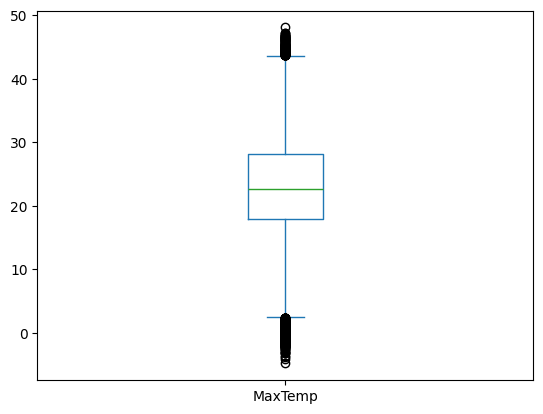

In [ ]:
dataset['MaxTemp'].plot(kind='box')

<Axes: >

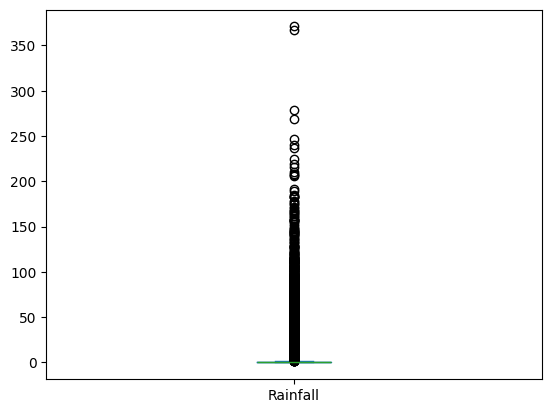

In [ ]:
dataset['Rainfall'].plot(kind='box')

Здесь можно увидеть, что наличие большого числа выбросов связано с тем, что в дни, когда не было дождя, осадки < 1мм. Так как в датасете большая часть записей имеет в столбце RainToday признак No, это приводит к выбросам в Rainfall.

# 4. Обработать пропущенные значения
Заполним пропущенные значения для каждой количественной переменной их медианой. Для категориальных признаков заполним самым популярным значением в столбце.

In [ ]:
dataset.median(numeric_only=True, axis=0)

,0
MinTemp,12.0
MaxTemp,22.6
Rainfall,0.0
Evaporation,4.8
Sunshine,8.4
WindGustSpeed,39.0
WindSpeed9am,13.0
WindSpeed3pm,19.0
Humidity9am,70.0
Humidity3pm,52.0


In [ ]:
dataset = dataset.fillna(dataset.median(axis=0, numeric_only=True), axis=0)
numerical_columns = dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()
dataset[numerical_columns]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3
2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2
3,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,4.8,8.4,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4
145456,3.6,25.3,0.0,4.8,8.4,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5
145457,5.4,26.9,0.0,4.8,8.4,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1
145458,7.8,27.0,0.0,4.8,8.4,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0


In [ ]:
categorical_columns = dataset.select_dtypes(include=['object']).columns.tolist()
dataset.describe(include = [object])

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,135134,134894,141232,142199,142193
unique,49,16,16,16,2,2
top,Canberra,W,N,SE,No,No
freq,3436,9915,11758,10838,110319,110316


In [ ]:
dataset['WindGustDir'] = dataset['WindGustDir'].fillna(dataset['WindGustDir'].describe().top)
dataset['WindDir9am'] = dataset['WindDir9am'].fillna(dataset['WindDir9am'].describe().top)
dataset['WindDir3pm'] = dataset['WindDir3pm'].fillna(dataset['WindDir3pm'].describe().top)
dataset['RainToday'] = dataset['RainToday'].fillna(dataset['RainToday'].describe().top)
dataset['RainTomorrow'] = dataset['RainTomorrow'].fillna(dataset['RainTomorrow'].describe().top)
dataset.describe(include = [object])

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,145460,145460,145460,145460
unique,49,16,16,16,2,2
top,Canberra,W,N,SE,No,No
freq,3436,20241,22324,15066,113580,113583


# 5. Обработать категориальные признаки

In [ ]:
dataset_describe = dataset.describe(include=[object])
binary_columns = [c for c in categorical_columns if dataset_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if dataset_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['RainToday', 'RainTomorrow'] ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


In [ ]:
dataset.loc[dataset['RainToday'] == 'No', 'RainToday'] = 0
dataset.loc[dataset['RainToday'] == 'Yes', 'RainToday'] = 1
dataset['RainToday'] = dataset['RainToday'].astype('float64')
dataset['RainToday'].describe()

,RainToday
count,145460.000000
mean,0.219167
std,0.413683
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
dataset['Year'] = dataset['Date'].dt.year
dataset['Month'] = dataset['Date'].dt.month
dataset['Day'] = dataset['Date'].dt.day
print(dataset.Year.head())
print(dataset.Month.head())
print(dataset.Day.head())
dataset.drop('Date', inplace=True, axis=1)

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int32
0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int32
0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int32


In [ ]:
dataset['Year'] = dataset['Year'].astype('int64')
dataset['Month'] = dataset['Month'].astype('int64')
dataset['Day'] = dataset['Day'].astype('int64')
print(dataset.Year.head())
print(dataset.Month.head())
print(dataset.Day.head())

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64
0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64
0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64


In [ ]:
dataset_nonbinary = pd.get_dummies(dataset[nonbinary_columns])
dataset_nonbinary.columns

Index(['Location_Adelaide', 'Location_Albany', 'Location_Albury',
       'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat',
       'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns',
       'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour',
       'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast',
       'Location_Hobart', 'Location_Katherine', 'Location_Launceston',
       'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura',
       'Location_Moree', 'Location_MountGambier', 'Location_MountGinini',
       'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead',
       'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF',
       'Location_Penrith', 'Location_Perth', 'Location_PerthAirport',
       'Location_Portland', 'Location_Richmond', 'Location_Sale',
       'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport',
       'Location_Townsville', 'Location_Tuggeranong', 'Location_Ulur

In [ ]:
len(dataset_nonbinary.columns)

97

# 6. Провести нормализацию

Приведем каждый количественный признак к нулевому среднем и единичному среднеквадратичному отклонению.

In [ ]:
numerical_columns = dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()
dataset_numerical = dataset[numerical_columns]
dataset_numerical.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.192053,23.215962,2.307990,5.179779,7.989889,39.962189,14.030751,18.669758,68.901251,51.553396,1017.644768,1015.250115,4.659755,4.709913,16.987101,21.668916,0.219167,2012.769751,6.399615,15.712258
std,6.365780,7.088358,8.389771,3.178819,2.757790,13.120931,8.861796,8.716716,18.855360,20.471345,6.728484,6.663994,2.281490,2.106768,6.449299,6.850658,0.413683,2.537684,3.427262,8.794789
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,2007.000000,1.000000,1.000000
25%,7.700000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000,0.000000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.200000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000,0.000000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000,2017.000000,12.000000,31.000000


In [ ]:
dataset_numerical = (dataset_numerical - dataset_numerical.mean(axis=0))/dataset_numerical.std(axis=0)
dataset_numerical.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
count,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05
mean,-4.501830e-16,3.001220e-16,-5.470974e-18,-3.438898e-17,-5.463158e-16,1.717495e-16,8.284618e-17,4.220466e-17,2.219652e-16,-7.503050e-17,-4.439305e-16,5.014538e-15,-1.281771e-16,6.174385e-17,6.252542e-17,-8.753558e-17,6.643325e-17,2.096790e-14,-1.541154e-16,3.971951e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.250514e+00,-3.952391e+00,-2.750957e-01,-1.629467e+00,-2.897207e+00,-2.588398e+00,-1.583285e+00,-2.141834e+00,-3.654200e+00,-2.518320e+00,-5.520525e+00,-5.724812e+00,-2.042418e+00,-2.235611e+00,-3.750345e+00,-3.951287e+00,-5.297936e-01,-2.273629e+00,-1.575490e+00,-1.672838e+00
25%,-7.056564e-01,-7.358491e-01,-2.750957e-01,-3.711376e-01,7.618806e-02,-6.830452e-01,-7.933776e-01,-6.504466e-01,-6.311866e-01,-7.109155e-01,-6.160032e-01,-6.227669e-01,-7.274875e-01,-3.369680e-01,-7.267613e-01,-7.253195e-01,-5.297936e-01,-6.973884e-01,-9.919333e-01,-8.769122e-01
50%,-3.016967e-02,-8.689767e-02,-2.750957e-01,-1.194718e-01,1.487099e-01,-7.333237e-02,-1.163140e-01,3.788606e-02,5.827249e-02,2.181605e-02,-6.653450e-03,-7.520227e-03,1.491327e-01,1.376927e-01,-4.451661e-02,-8.304543e-02,-5.297936e-01,9.073190e-02,-1.165989e-01,3.271737e-02
75%,7.238621e-01,7.031302e-01,-2.035800e-01,6.361066e-03,2.574926e-01,4.601664e-01,5.607497e-01,6.114966e-01,7.477316e-01,6.568500e-01,6.175585e-01,6.227324e-01,5.874428e-01,6.123535e-01,6.997503e-01,6.614086e-01,-5.297936e-01,8.788522e-01,7.587355e-01,8.286433e-01
max,3.410100e+00,3.510551e+00,4.394542e+01,4.398496e+01,2.360626e+00,7.243222e+00,1.308643e+01,7.838990e+00,1.649332e+00,2.366557e+00,3.471099e+00,3.653947e+00,1.902373e+00,2.036336e+00,3.599290e+00,3.653822e+00,1.887514e+00,1.666972e+00,1.634070e+00,1.738273e+00


### Соединим все в одну таблицу

In [ ]:
fixed_dataset = pd.concat((dataset_numerical, dataset_nonbinary, dataset[binary_columns]), axis =1 )
fixed_dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day,RainToday
count,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,...,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,145460.000000
mean,-4.501830e-16,3.001220e-16,-5.470974e-18,-3.438898e-17,-5.463158e-16,1.717495e-16,8.284618e-17,4.220466e-17,2.219652e-16,-7.503050e-17,...,5.014538e-15,-1.281771e-16,6.174385e-17,6.252542e-17,-8.753558e-17,6.643325e-17,2.096790e-14,-1.541154e-16,3.971951e-17,0.219167
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.413683
min,-3.250514e+00,-3.952391e+00,-2.750957e-01,-1.629467e+00,-2.897207e+00,-2.588398e+00,-1.583285e+00,-2.141834e+00,-3.654200e+00,-2.518320e+00,...,-5.724812e+00,-2.042418e+00,-2.235611e+00,-3.750345e+00,-3.951287e+00,-5.297936e-01,-2.273629e+00,-1.575490e+00,-1.672838e+00,0.000000
25%,-7.056564e-01,-7.358491e-01,-2.750957e-01,-3.711376e-01,7.618806e-02,-6.830452e-01,-7.933776e-01,-6.504466e-01,-6.311866e-01,-7.109155e-01,...,-6.227669e-01,-7.274875e-01,-3.369680e-01,-7.267613e-01,-7.253195e-01,-5.297936e-01,-6.973884e-01,-9.919333e-01,-8.769122e-01,0.000000
50%,-3.016967e-02,-8.689767e-02,-2.750957e-01,-1.194718e-01,1.487099e-01,-7.333237e-02,-1.163140e-01,3.788606e-02,5.827249e-02,2.181605e-02,...,-7.520227e-03,1.491327e-01,1.376927e-01,-4.451661e-02,-8.304543e-02,-5.297936e-01,9.073190e-02,-1.165989e-01,3.271737e-02,0.000000
75%,7.238621e-01,7.031302e-01,-2.035800e-01,6.361066e-03,2.574926e-01,4.601664e-01,5.607497e-01,6.114966e-01,7.477316e-01,6.568500e-01,...,6.227324e-01,5.874428e-01,6.123535e-01,6.997503e-01,6.614086e-01,-5.297936e-01,8.788522e-01,7.587355e-01,8.286433e-01,0.000000
max,3.410100e+00,3.510551e+00,4.394542e+01,4.398496e+01,2.360626e+00,7.243222e+00,1.308643e+01,7.838990e+00,1.649332e+00,2.366557e+00,...,3.653947e+00,1.902373e+00,2.036336e+00,3.599290e+00,3.653822e+00,1.887514e+00,1.666972e+00,1.634070e+00,1.738273e+00,1.000000


In [ ]:
fixed_dataset

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday,RainTomorrow
0,0.189756,-0.044575,-0.203580,-0.119472,0.14871,0.307738,0.673594,0.611497,0.111308,-1.443647,...,False,False,False,False,False,False,True,False,0.0,No
1,-0.752783,0.265793,-0.275096,-0.119472,0.14871,0.307738,-1.131909,0.382052,-1.320646,-1.297101,...,False,False,False,False,False,False,False,True,0.0,No
2,0.111211,0.350439,-0.275096,-0.119472,0.14871,0.460166,0.560750,0.840941,-1.638858,-1.052857,...,False,False,False,False,False,False,False,True,0.0,No
3,-0.470022,0.674915,-0.275096,-0.119472,0.14871,-1.216544,-0.342002,-1.109335,-1.267610,-1.736740,...,False,False,False,False,False,False,False,False,0.0,No
4,0.833825,1.281543,-0.155903,-0.119472,0.14871,0.079096,-0.793378,0.152608,0.694696,-0.906311,...,False,False,False,False,False,False,False,False,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,-1.475397,0.025963,-0.275096,-0.119472,0.14871,-0.683045,-0.116314,-0.879891,-0.949399,-1.345949,...,False,False,False,False,False,False,False,False,0.0,No
145456,-1.349725,0.294009,-0.275096,-0.119472,0.14871,-1.368972,-0.116314,-1.109335,-0.684222,-1.492496,...,False,False,False,False,False,False,False,False,0.0,No
145457,-1.066963,0.519731,-0.275096,-0.119472,0.14871,-0.225761,-0.567690,-1.109335,-0.843328,-1.345949,...,False,False,False,False,False,False,True,False,0.0,No
145458,-0.689947,0.533838,-0.275096,-0.119472,0.14871,-0.911687,-0.116314,-1.338779,-0.949399,-1.345949,...,False,False,False,False,False,False,False,False,0.0,No


# 2. Разбить данные на обучающую и тестовую выборки

In [ ]:
X = fixed_dataset.drop('RainTomorrow', axis = 1) # Выбрасываем целевой столбец
y = fixed_dataset['RainTomorrow']
feature_names = X.columns
print(type(feature_names))
print(feature_names)

<class 'pandas.core.indexes.base.Index'>
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE',
       'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW',
       'WindDir3pm_WSW', 'RainToday'],
      dtype='object', length=118)


In [ ]:
X = X.to_numpy()
y = np.array(y != 'No', dtype='int')
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(X.shape)
print(y.shape)
N, d = X.shape

(145460, 118)
(145460,)


In [ ]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

print(N_train, N_test)

101822 43638


# 7. Запустить классификатор ближайших соседей (kNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(
    n_neighbors = 10, algorithm = 'auto', leaf_size = 30,
    metric='minkowski', metric_params=None, n_jobs=None, p=2, weights='uniform'
    )
knn.fit(X_train, y_train)
print(knn)

KNeighborsClassifier(n_neighbors=10)


In [ ]:
y_test_predict = knn.predict(X_test)
err_test1 = np.mean(y_test != y_test_predict)
err_test2 = 1 - knn.score(X_test, y_test)
print(err_test1)
print(err_test2)
err_test = err_test1

0.15981484027682294
0.1598148402768229


In [ ]:
err_train = np.mean(y_train != knn.predict(X_train))

print(err_train, err_test)

0.13819213922335055 0.15981484027682294


### Матрица рассогласования:

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_predict))

[[32782  1205]
 [ 5769  3882]]


Получается, что:

 - True Negative, то есть модель правильно предсказала ответ 0: `3882` раз.
  - False Negative, то есть модель неправильно предсказала ответ 0: `5769` раз.
  -  False Positive, то есть модель неправильно предсказала ответ 1: `1205` раз
  - True Positive? то есть модель правильно предсказала ответ 1:
   `32782` раз

   Ошибка на тренировочных данных составила 13.8%, на тестовых 15.9%
   Правильно предсказано было 32782 + 3882 = 36664.

Теперь подберем параметры получше для метода ближайших соседей:

In [ ]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.15642988563655558 25


In [ ]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)
y_best_predict = knn.predict(X_test)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != y_best_predict)

print(err_train, err_test)

0.1461570191117833 0.15607956368302855


Лучшим параметром стал параметр 25. Ошибка на тренировочной выборке ухудшилась до 14.6%, но на тестовых улучшилась до 15.6%.

In [ ]:
print(confusion_matrix(y_test, y_best_predict))

[[32649  1338]
 [ 5473  4178]]


Можно видеть, что стало больше True Negative, по сравнению с предыдущим запуском для параметра 10, но True Positive также и немного уменьшилось. Получилось, что правильных предсказаний: 32649 + 4178 = 36827
Увеличили число правильных предсказаний на 163.

# По желанию: Запустить другие классификаторы, побороться с несбалансированностью классов и исключить коррелированные переменные.
Сделаем это все перед тем, как запустить снова метод ближайших соседей и другие классификаторы.

Несмотря на то, что у меня есть несбалансированность классов, она небольшая: примерно 76% к 24%. Она не сильно влияет на обучение. Можно применить метод взвешивания в деревьях для легкого усиления значения того класса, которого меньше в датасете.

In [ ]:
data = pd.read_csv(filepath)
data['Date'] = pd.to_datetime(data['Date'], errors='coerce', format="%Y-%m-%d")

<Axes: >

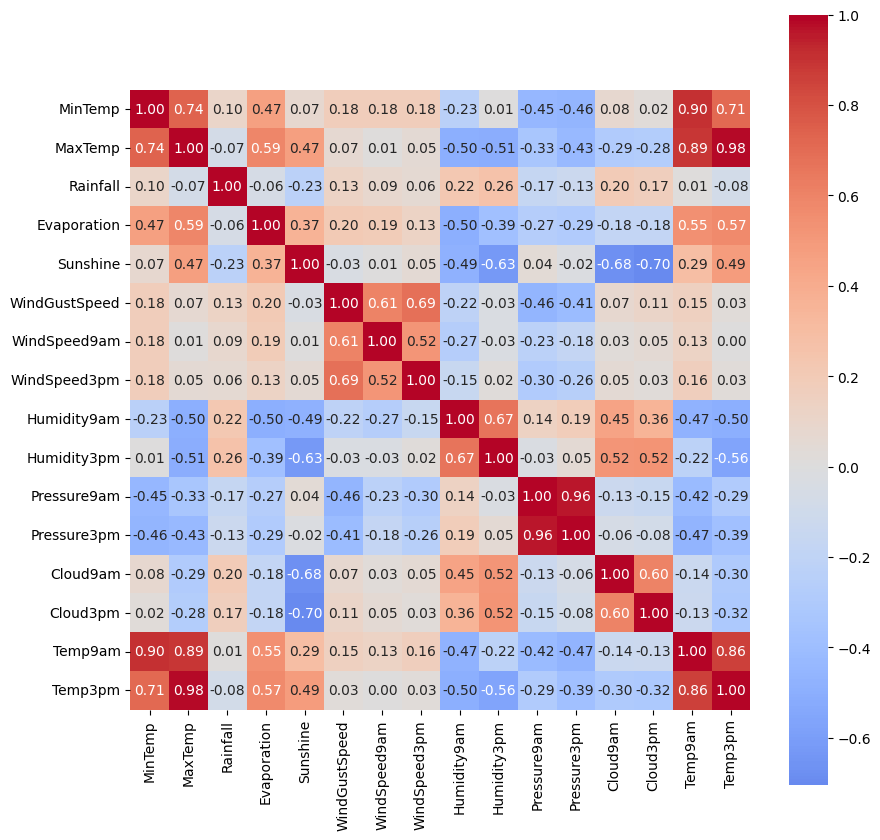

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f')

Избавимся от коррелированных переменных: \
MinTemp - MaxTemp оставим MaxTemp \
Humidity9am - Humidity3pm оставим Humidity3pm \
Pressure9am - Pressure3pm оставим Pressure3pm \
Temp9am - Temp3pm оставимс Temp3pm

In [ ]:
data.drop(columns = ['MinTemp', 'Humidity9am', 'Pressure9am', 'Temp9am'], inplace=True)

<Axes: >

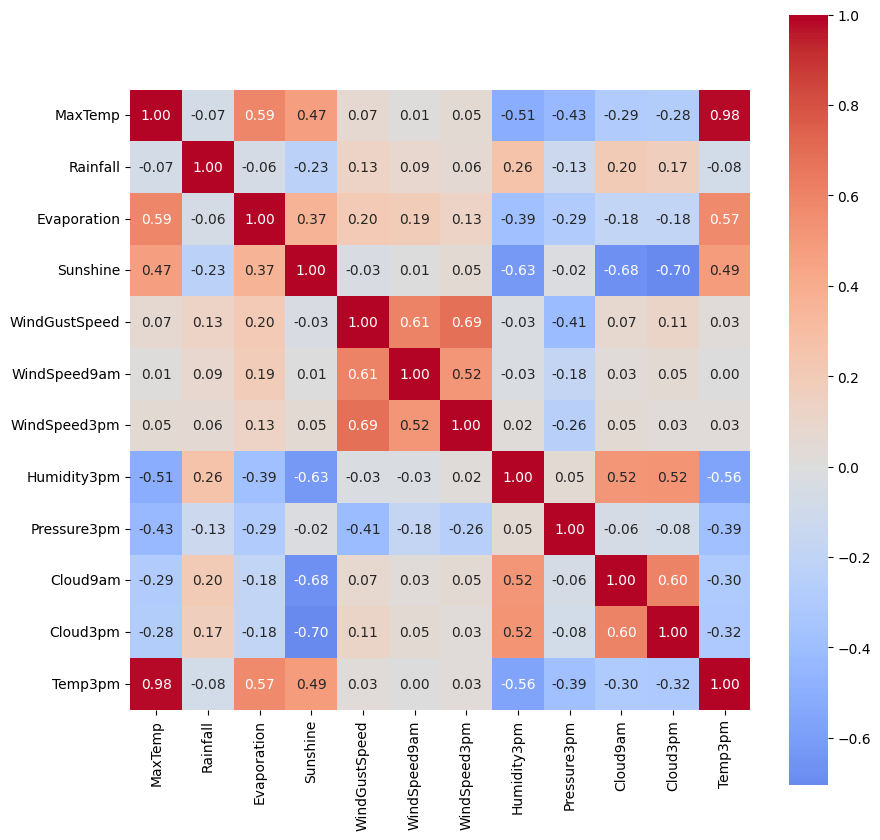

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f')

In [ ]:
data = data.fillna(data.median(axis=0, numeric_only=True), axis=0)
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

In [ ]:
data['WindGustDir'] = data['WindGustDir'].fillna(data['WindGustDir'].describe().top)
data['WindDir9am'] = data['WindDir9am'].fillna(data['WindDir9am'].describe().top)
data['WindDir3pm'] = data['WindDir3pm'].fillna(data['WindDir3pm'].describe().top)
data['RainToday'] = data['RainToday'].fillna(data['RainToday'].describe().top)
data['RainTomorrow'] = data['RainTomorrow'].fillna(data['RainTomorrow'].describe().top)

In [ ]:
data_describe = data.describe(include=[object])
binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]

In [ ]:
data.loc[data['RainToday'] == 'No', 'RainToday'] = 0
data.loc[data['RainToday'] == 'Yes', 'RainToday'] = 1
data['RainToday'] = data['RainToday'].astype('float64')

In [ ]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data.drop('Date', inplace=True, axis=1)
data['Year'] = data['Year'].astype('int64')
data['Month'] = data['Month'].astype('int64')
data['Day'] = data['Day'].astype('int64')

In [ ]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
data_nonbinary.columns
len(data_nonbinary.columns)

97

In [ ]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
data_numerical = data[numerical_columns]

In [ ]:
data_numerical = (data_numerical - data_numerical.mean(axis=0))/data_numerical.std(axis=0)

In [ ]:
fixed_data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis =1 )

In [ ]:
X = fixed_data.drop('RainTomorrow', axis = 1)
y = fixed_data['RainTomorrow']
feature_names = X.columns

In [ ]:
X = X.to_numpy()
y = np.array(y != 'No', dtype='int')

In [ ]:
N, d = X.shape

### Еще раз kNN

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

print(N_train, N_test)

101822 43638


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

Можно видеть, что на тренировочных данных после того, как убрали коррелированные переменные, что ошибка на тренировочных данных увеличилась на 0.03%, зато на тестовых данных улучшилась на 0.02%.

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, knn.predict(X_test)))

   Правильно предсказано было 32742 + 4093 = 36835.
   (Размер выборок что до работы с коррелированными переменными, что после работы с ними, одинаковый). Получили еще 8 правильных предсказаний. Так как kNN - алгоритм, в котором нет элемента случайности, то то, что мы получаем еще больше правильных предсказаний - результат улучшений алгоритма с помощью других параметров и отбирания коррелированных переменных.

### SVC – машина опорных векторов


In [ ]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

Ошибка на тестовых данных упала до 15%!

Подбор параметров в svc:

In [ ]:
# from sklearn.model_selection import GridSearchCV
# Cs = [0.1, 1, 10, 100]
# gammas = [0.001, 0.01, 0.1, 1]
# svc = SVC(gamma='auto')
# grid = GridSearchCV(svc, cv=3, param_grid = {'C': Cs, 'gamma': gammas})
# grid.fit(X_train, y_train)

# best_cv_err = 1 - grid.best_score_
# best_C = grid.best_estimator_.C
# print(best_cv_err, best_C)

In [ ]:
# svc = SVC(C = best_C, gamma='auto').fit(X_train, y_train)

# err_train = np.mean(y_train != svc.predict(X_train))
# err_test  = np.mean(y_test  != svc.predict(X_test))

# print(err_train, err_test)

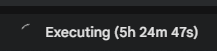 \
Я пыталась...

### Random Forest - случайный лес

In [ ]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.14464457582840642


Получили наименьшую возможную ошибку: 14.46%

Значимость признаков:

In [ ]:
np.sum(rf.feature_importances_)

np.float64(1.0)

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
 1. feature 'Humidity3pm' (0.149093)
 2. feature 'Pressure3pm' (0.067591)
 3. feature 'WindGustSpeed' (0.053312)
 4. feature 'Sunshine' (0.051844)
 5. feature 'Temp3pm' (0.050382)
 6. feature 'Rainfall' (0.049553)
 7. feature 'MaxTemp' (0.049391)
 8. feature 'Cloud3pm' (0.038445)
 9. feature '  Day' (0.037368)
10. feature 'WindSpeed3pm' (0.035141)
11. feature 'WindSpeed9am' (0.033165)
12. feature 'Month' (0.028435)
13. feature ' Year' (0.027637)
14. feature 'Evaporation' (0.026819)
15. feature 'Cloud9am' (0.026568)
16. feature 'RainToday' (0.019290)
17. feature 'RainToday' (0.018919)
18. feature 'WindDir9am_N' (0.005675)
19. feature 'WindGustDir_W' (0.004970)
20. feature 'WindDir3pm_NW' (0.003992)
21. feature 'WindDir3pm_SE' (0.003983)
22. feature 'WindDir3pm_WNW' (0.003939)
23. feature 'WindDir9am_NW' (0.003900)
24. feature 'WindDir3pm_N' (0.003885)
25. feature 'WindDir9am_NNE' (0.003824)
26. feature 'WindGustDir_N' (0.003793)
27. feature 'WindDir3pm_W' (0.003763)
28.

(-1.0, 20.0)

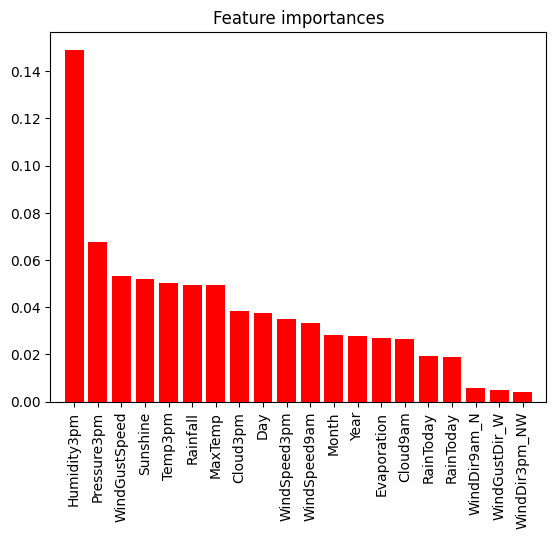

In [ ]:
d_first = 20
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

Самым важным признаком является влажность, а также давление, их догоняют скорость ветра, кол-во солнечных часов, температура днем и кол-во осадков, а также максимальная температура за день.

Попробуем добавить автоматического баланса в Random Trees:

In [ ]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000, class_weight='balanced',)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.14604244007516384


Автоматический баланс не очень хорошо справился. Давайте попробуем ручной баланс:

In [ ]:
from sklearn import ensemble
weights = {0: 1.0, 1: 1.5}
rf = ensemble.RandomForestClassifier(n_estimators = 1000, class_weight=weights,)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.14434667033319584


Ошибка упала до 14.43%, стало немного лучше

### Extremely Randomized Trees - экстремально случайный лес

In [ ]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.0 0.14840276822952472


Экстремально случайный лес ситуацию не улучшил, ошибка 14.84%

### AdaBoost - алгоритм AdaBoost

In [ ]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.15179430771346075 0.15236720289655806


Алгоритм AdaBoost показал ошибку в 15.2%. Скорее всего у него стоит искать наилучшие параметры. Можно попробовать сделать что-то с количеством итераций, с learning_rate, поменять algorithm.

### GBT - градиентный бустинг деревьев решений

In [ ]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.1282925104594292 0.14191759475686327


## Ошибка на тренировочной составила 12.8%, на тестовой 14.19%. Мы получили самую наименьшую ошибку с помощью градиентного бустинга решений. Ура!